In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier



# Random forests

In [2]:
from util.functions import impute_and_train

model = RandomForestClassifier

results = impute_and_train(model)

    

learning with mean imputed data
Cross-validation iteration 1/5
Cross-validation iteration 2/5
Cross-validation iteration 3/5
Cross-validation iteration 4/5
Cross-validation iteration 5/5
learning with median imputed data
Cross-validation iteration 1/5
Cross-validation iteration 2/5
Cross-validation iteration 3/5
Cross-validation iteration 4/5
Cross-validation iteration 5/5
learning with mode imputed data
Cross-validation iteration 1/5
Cross-validation iteration 2/5
Cross-validation iteration 3/5
Cross-validation iteration 4/5
Cross-validation iteration 5/5
learning with KNN imputed data
Cross-validation iteration 1/5
Cross-validation iteration 2/5
Cross-validation iteration 3/5
Cross-validation iteration 4/5
Cross-validation iteration 5/5
learning with MICE imputed data
Cross-validation iteration 1/5
Cross-validation iteration 2/5
Cross-validation iteration 3/5
Cross-validation iteration 4/5
Cross-validation iteration 5/5
learning with iterative imputed data
Cross-validation iteration 

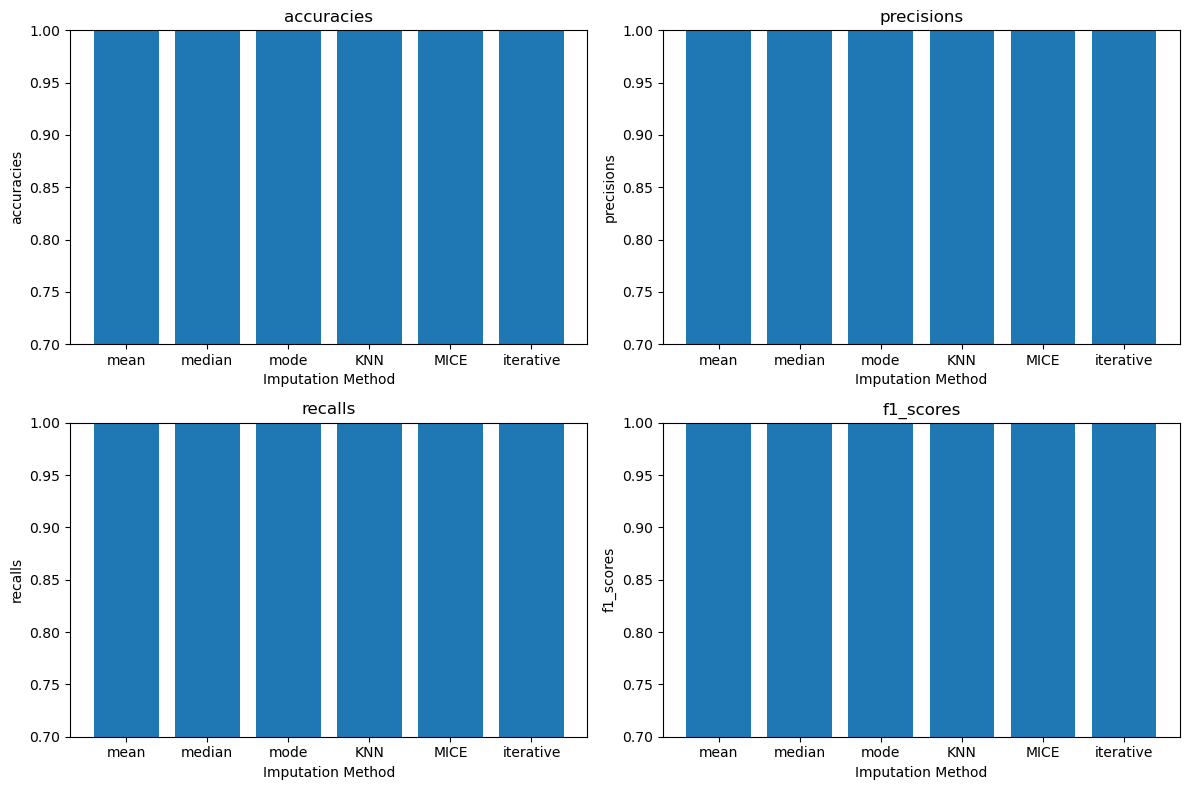

In [3]:
from util.functions import plot_metrics
plot_metrics(results['metrics'])
    

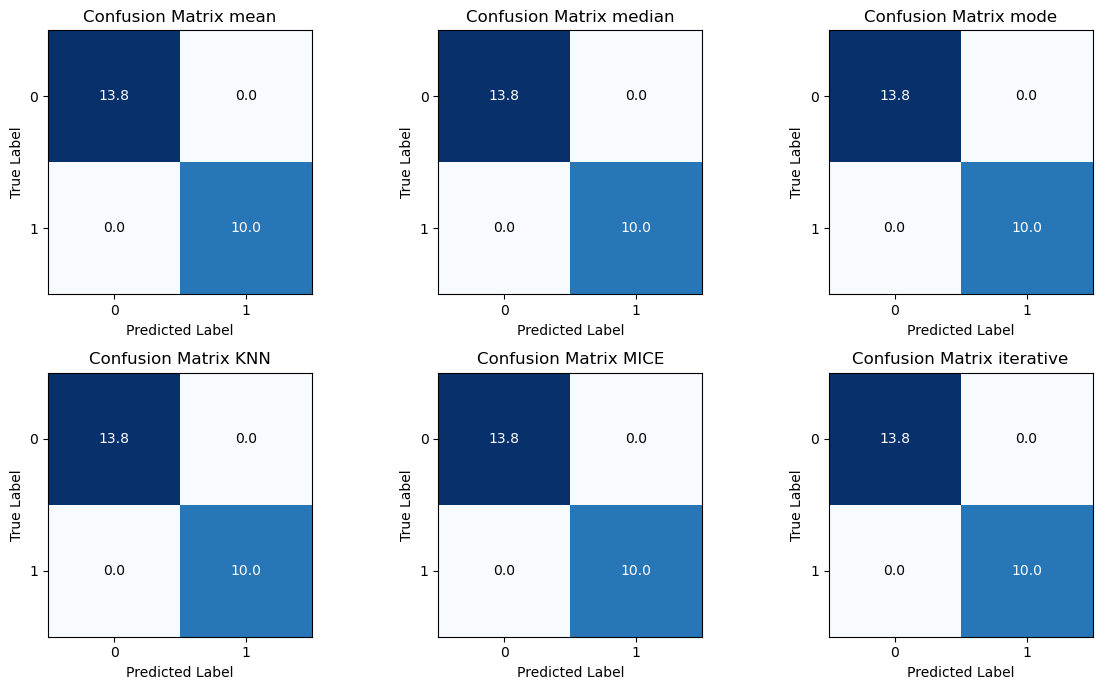

In [4]:
from util.functions import plot_mean_confusion_matrices
plot_mean_confusion_matrices(results['confusion_matrices'])

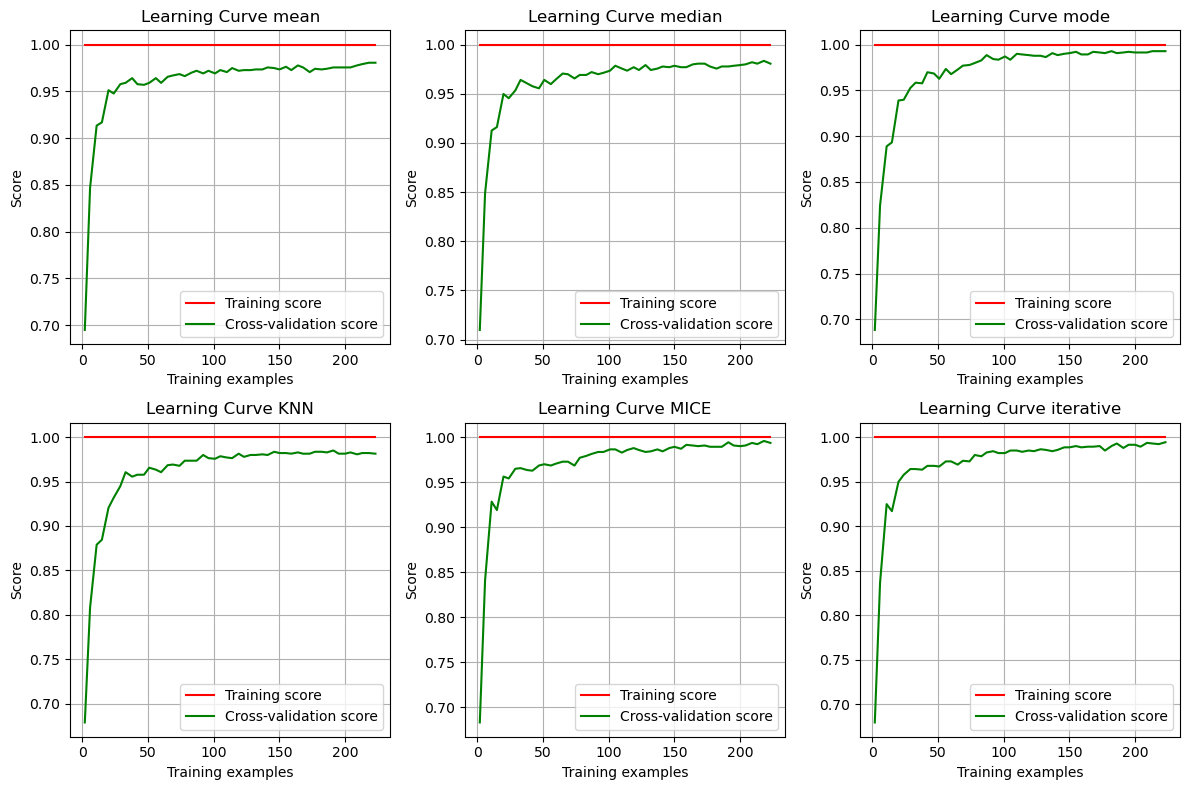

In [5]:
from util.functions import plot_learning_curves
plot_learning_curves(results['learning_curves'])

feature importances for iteration 0


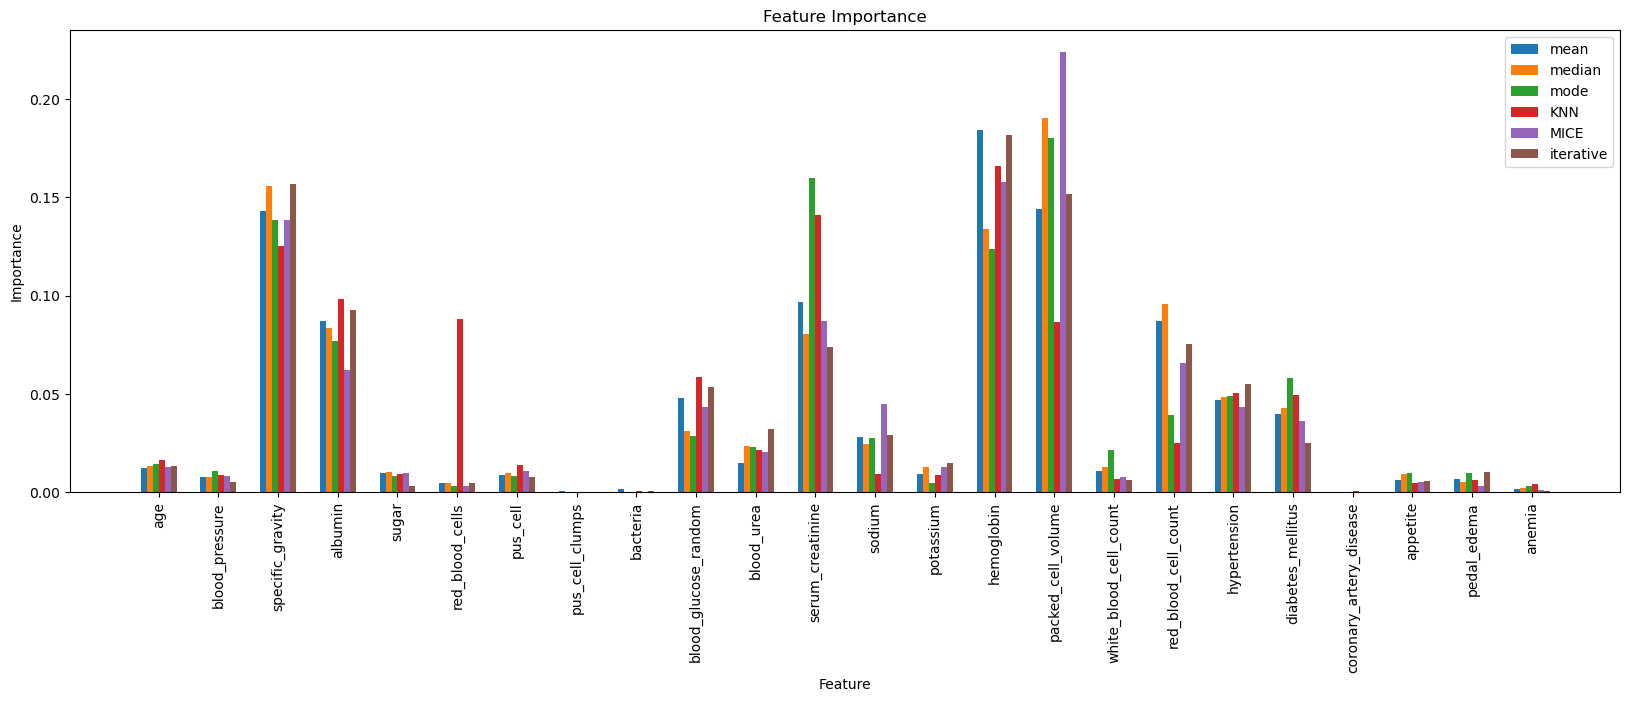

feature importances for iteration 1


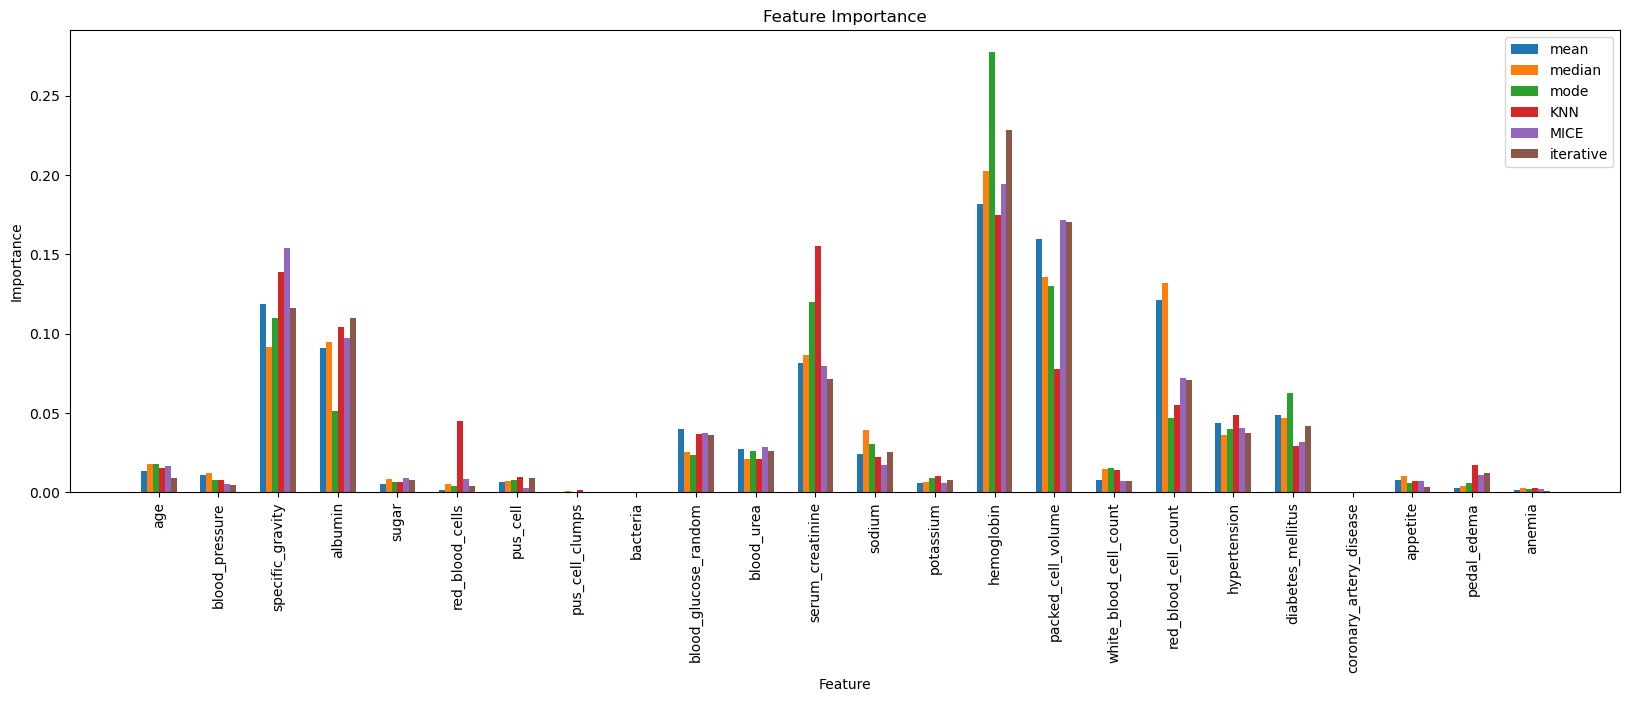

feature importances for iteration 2


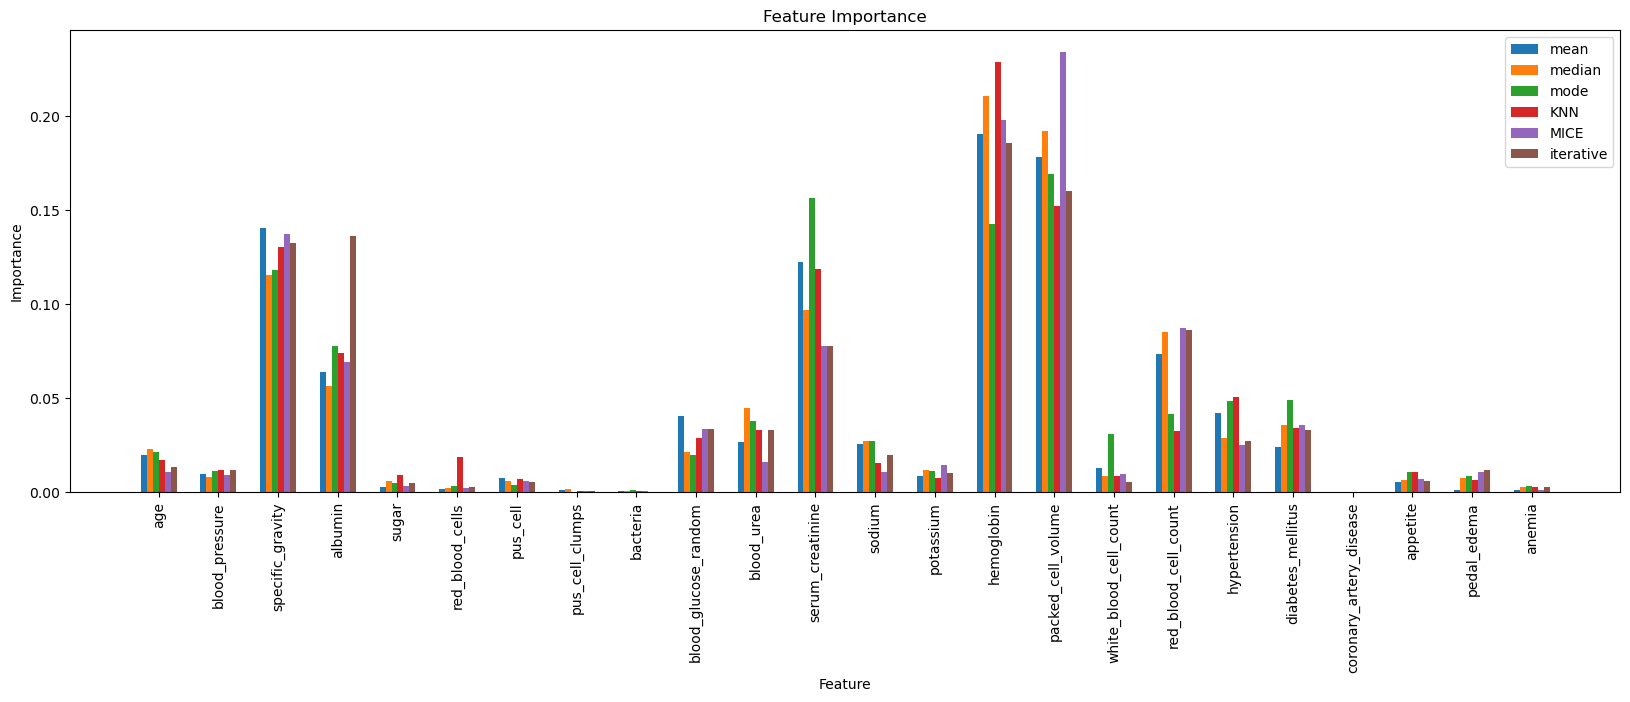

feature importances for iteration 3


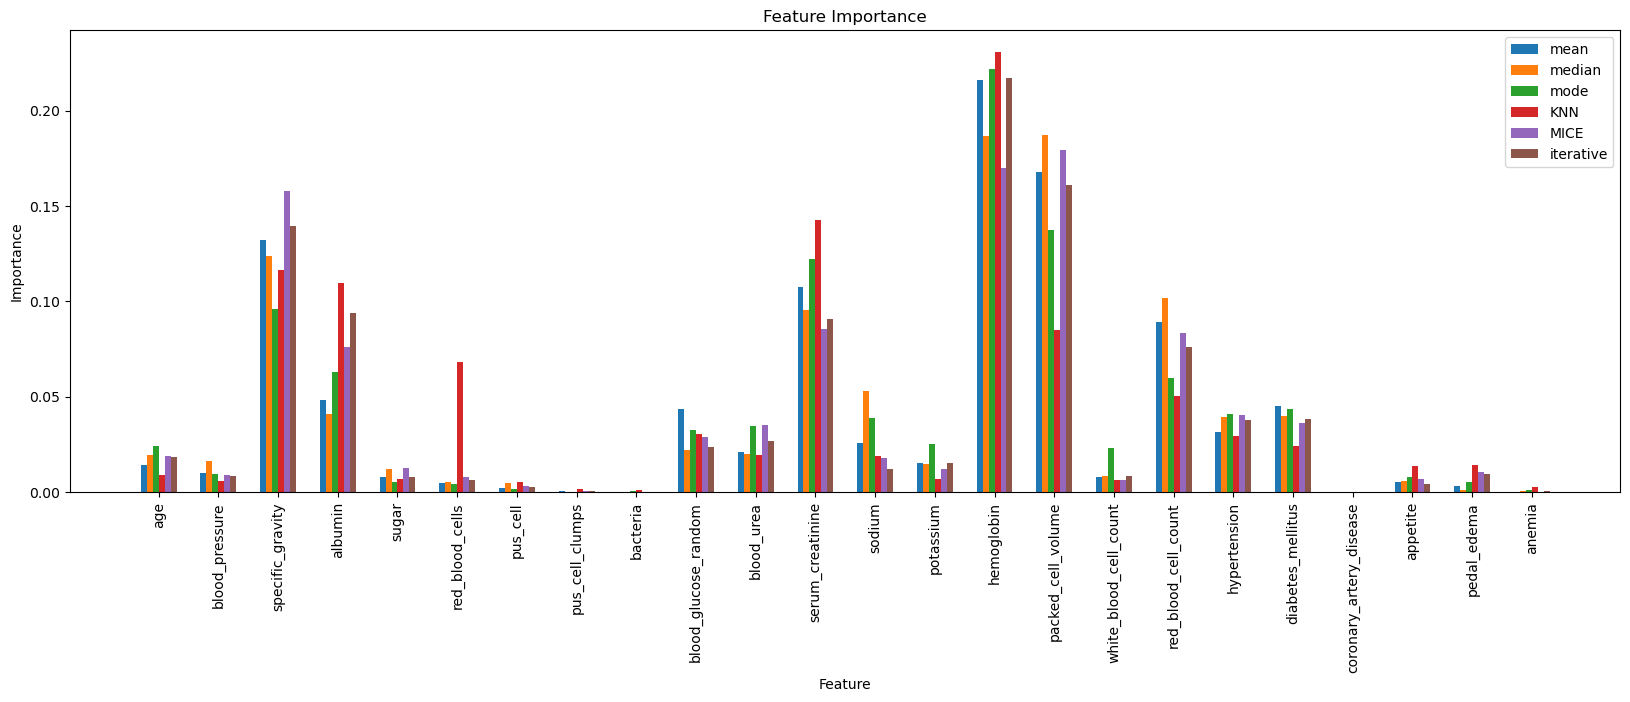

feature importances for iteration 4


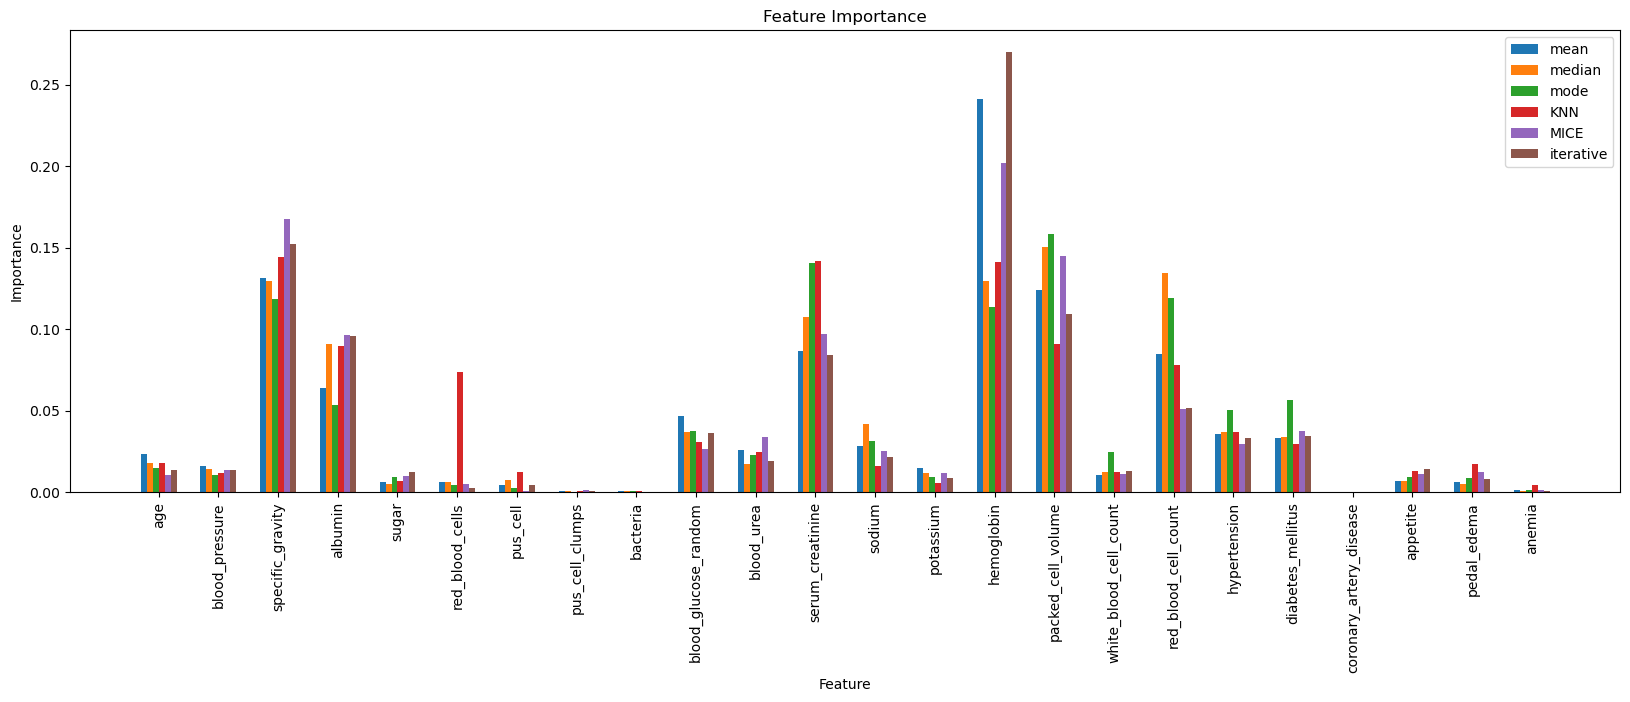

In [6]:
from util.functions import plot_feature_importances
# plot all feature importances as subplots
import pandas as pd
import numpy as np
df_numeric = pd.read_csv('processed/df_numeric.csv')
feature_importances = {}
all_feature_importances = {}
for i in range(5):
    for (name, models) in results['models'].items():
        feature_importances[name] = pd.DataFrame(models[i].feature_importances_, index=df_numeric.drop(columns=['class']).columns, columns=['Importance'])

    print('feature importances for iteration', i)
    plot_feature_importances(feature_importances)


#### Mean feature importances across all folds

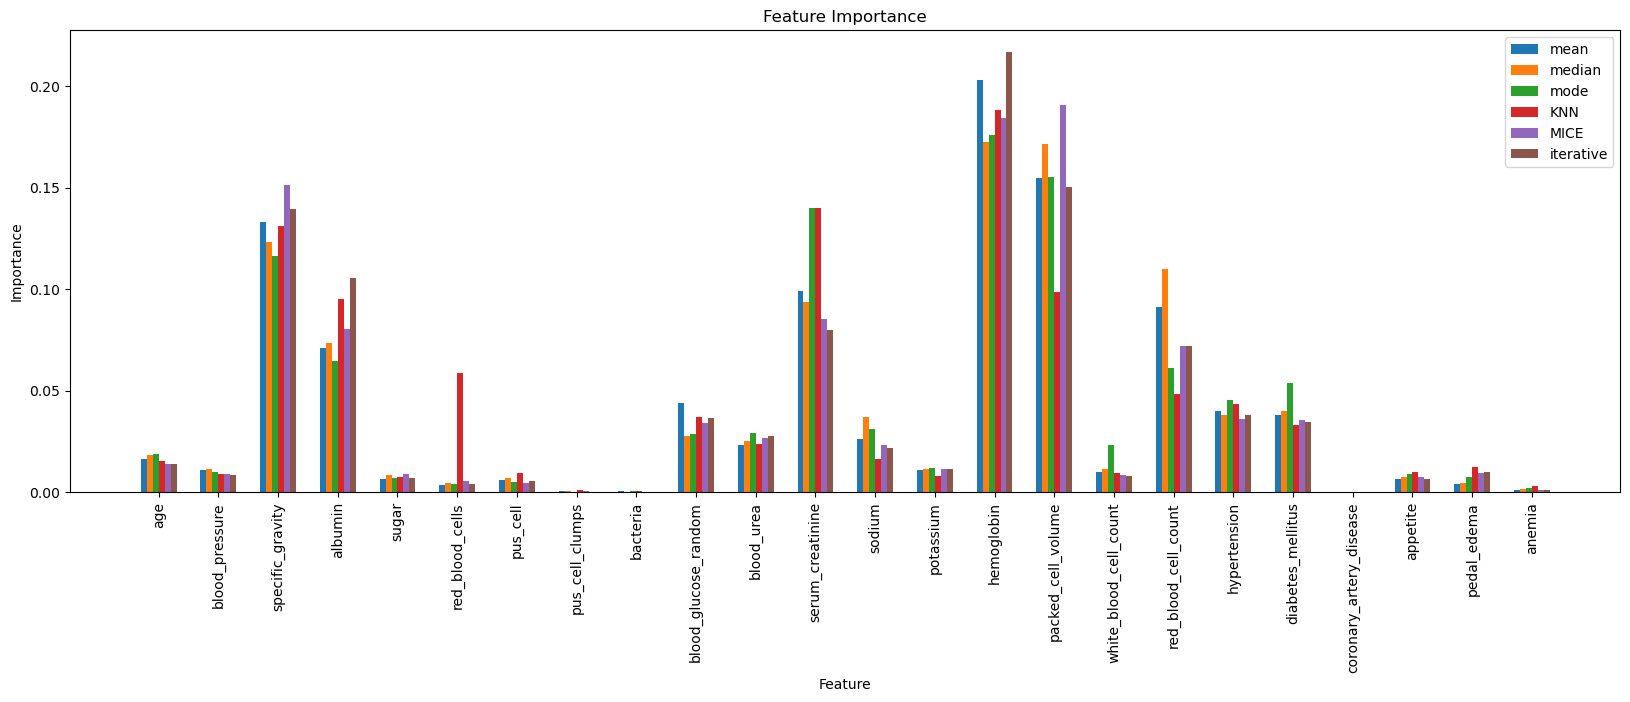

In [7]:
from util.functions import plot_feature_importances
# plot all feature importances as subplots
import pandas as pd
import numpy as np
df_numeric = pd.read_csv('processed/df_numeric.csv')
feature_importances = {}
for (name, models) in results['models'].items():
    fi = []
    for i, model in enumerate(models):
        fi.append(model.feature_importances_)

    feature_importances[name] = pd.DataFrame(np.mean(fi, axis=0), index=df_numeric.drop(columns=['class']).columns, columns=['Importance'])

plot_feature_importances(feature_importances)
